Data Diri

*   Nama Lengkap  : Winer Wijaya
*   Email         : Winerwijaya05@gmail.com
*   Nomor Telp/WA : 6281287837152
*   Kota          : Pangkalpinang



In [2]:
#mengunduh dataset rockpaperscissors
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-23 07:16:45--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.03MB/s    in 4m 42s  

2021-05-23 07:21:28 (1.09 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#ekstraksi dataset dari ZIP
import zipfile,os
path_zip = '/tmp/rockpaperscissors.zip'
zip = zipfile.ZipFile(path_zip, 'r')
zip.extractall('/tmp')
zip.close()

In [4]:
pip install split_folders

In [5]:
import splitfolders
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output='/tmp/rockpaperscissors/dataset', seed = 1337, ratio=(.6, .4))

train_dir = os.path.join('/tmp/rockpaperscissors/dataset', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors/dataset', 'val')

Copying files: 2188 files [00:00, 3326.88 files/s]


In [6]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#membuat object untuk data train
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

#membuat object untuk data test
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# mempersiapkan data train 
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=32,
        class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [9]:
# membuat arsitektur model CNN
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #untuk klasifikasi
])

In [10]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint

filepath = 'tmp/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5'
cp = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks = [cp]

testing = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=15,
      callbacks=callbacks)


Epoch 1/25
25/25 [==============================] - 49s 2s/step - loss: 0.4369 - accuracy: 0.8512 - val_loss: 0.3437 - val_accuracy: 0.8854

Epoch 00001: val_accuracy improved from -inf to 0.88542, saving model to tmp/weights-improvement-01-0.89.hdf5
Epoch 2/25
25/25 [==============================] - 49s 2s/step - loss: 0.3492 - accuracy: 0.8800 - val_loss: 0.2620 - val_accuracy: 0.9146

Epoch 00002: val_accuracy improved from 0.88542 to 0.91458, saving model to tmp/weights-improvement-02-0.91.hdf5
Epoch 3/25
25/25 [==============================] - 48s 2s/step - loss: 0.2835 - accuracy: 0.9075 - val_loss: 0.2481 - val_accuracy: 0.9167

Epoch 00003: val_accuracy improved from 0.91458 to 0.91667, saving model to tmp/weights-improvement-03-0.92.hdf5
Epoch 4/25
25/25 [==============================] - 48s 2s/step - loss: 0.2456 - accuracy: 0.9162 - val_loss: 0.2050 - val_accuracy: 0.9312

Epoch 00004: val_accuracy improved from 0.91667 to 0.93125, saving model to tmp/weights-improvement-

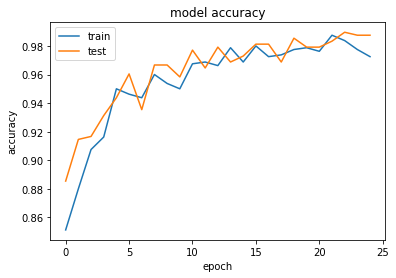

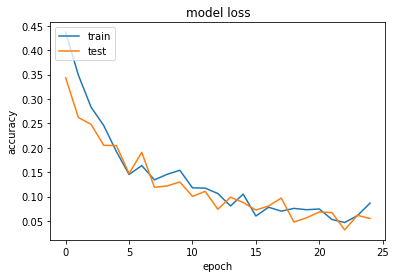

In [17]:
import matplotlib.pyplot as plt

plt.plot(testing.history['accuracy'])
plt.plot(testing.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(testing.history['loss'])
plt.plot(testing.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 1.png to 1.png
[[1. 0. 0.]]
Paper


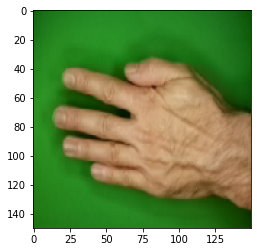

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  c = model.predict(images)
  print(c)

  if c[0][0]:
    print("Paper")
  elif c[0][1]:
    print("Rock")
  elif c[0][2]:
    print("Scissors")
